In [8]:
from airsenal.framework.bpl_interface import get_fitted_team_model, get_training_data
from airsenal.framework.schema import session
from airsenal.framework.season import get_teams_for_season

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
season = "2122"
gameweeks = [1, 2, 3, 4, 5, 19, 38]

models = {gw: get_fitted_team_model(season, gw, session) for gw in gameweeks}
teams = get_teams_for_season(season, session)

Fitting team model...


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:12<00:00, 119.82it/s, 63 steps of size 4.61e-02. acc. prob=0.94]


Adding BRE to team model with covariates
Fitting team model...


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:12<00:00, 116.33it/s, 127 steps of size 4.53e-02. acc. prob=0.94]


Fitting team model...


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:10<00:00, 139.42it/s, 127 steps of size 5.22e-02. acc. prob=0.91]


Fitting team model...


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:10<00:00, 139.26it/s, 63 steps of size 5.69e-02. acc. prob=0.90]


Fitting team model...


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:10<00:00, 144.51it/s, 63 steps of size 5.62e-02. acc. prob=0.90]


Fitting team model...


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:14<00:00, 104.62it/s, 127 steps of size 4.25e-02. acc. prob=0.91]


Fitting team model...


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:15<00:00, 97.35it/s, 127 steps of size 4.36e-02. acc. prob=0.92]


In [3]:
def plot_team(team):
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(f"{season} {team}")
    ax[0].set_title("Attack")
    ax[1].set_title("Defence")
    ax[2].set_title("Mean")
    mean_att = []
    mean_def = []
    for gw, m in models.items():
        if gw <=5:
            sns.kdeplot(m.attack[:, m.teams.index(team)], ax=ax[0])
            sns.kdeplot(m.defence[:, m.teams.index(team)], ax=ax[1])
        mean_att.append(m.attack[:, m.teams.index(team)].mean())
        mean_def.append(m.defence[:, m.teams.index(team)].mean())
    
    ax[2].plot(list(models.keys()), mean_att, label="attack", marker="o")
    ax[2].plot(list(models.keys()), mean_def, label="defence", marker="o")
    ax[2].legend()

    ax[2].set_xlim([1, 5])
    fig.tight_layout()

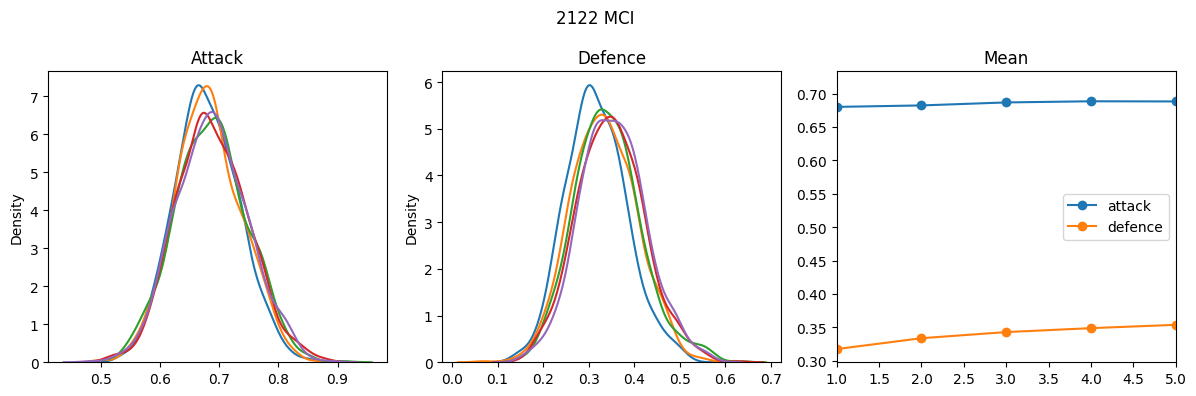

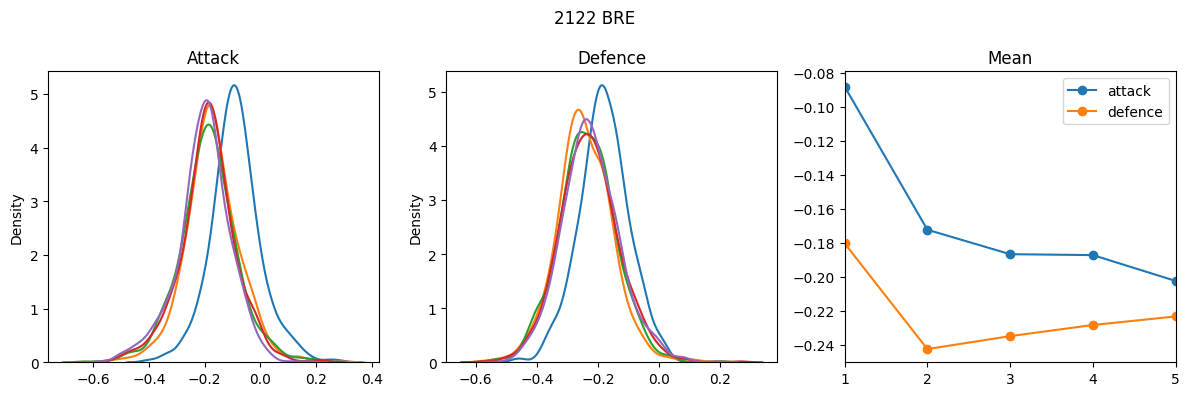

In [4]:
plot_team("MCI")
plot_team("BRE")